<a href="https://colab.research.google.com/github/yeeh-l/Tensorflow/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H3>資二_B0729066_20200728

# <H2> Training:
<H3> dataset: Cifar 10

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

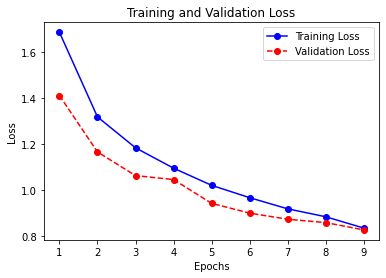

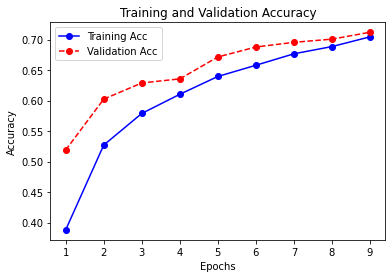

In [41]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型 (Conv2D - Pool - Dropout)*N - Dense
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=9, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: cifar10.h5 ...")
model.save("cifar10.h5")
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<H2>Show Pic : 

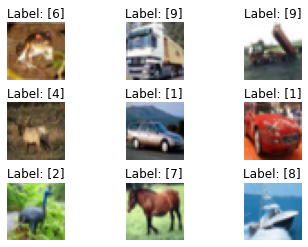

In [190]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
# 載入 Cifar10 資料集, 如果是第一次載入會自行下載資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 繪出9張圖片
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="binary")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .4)
# 顯示數字圖片
plt.show()

[]

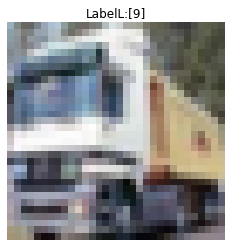

In [191]:
plt.imshow(X_train[1],cmap='binary')
plt.title("LabelL:"+str(Y_train[1]))
plt.axis('off')

plt.plot()

<H3>
#0 airplane<BR>
#1 car<BR>
#2 bird<BR>
#3 cat<BR>
#4 deer<BR>
#5 dog<BR>
#6 frog<BR>
#7 horse<BR>
#8 ship<BR>
#9 truck<BR>


<H2>Predict:

In [192]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
Y_test_bk = Y_test.copy()   # 備份 Y_test 資料集
Y_pred = model.predict_classes(X_test)
# 顯示混淆矩陣
tb = pd.crosstab(Y_test_bk.astype(int).flatten(), 
                 Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)

#0 airplane
#1 car
#2 bird
#3 cat
#4 deer
#5 dog
#6 frog
#7 horse
#8 ship
#9 truck

predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        839   11   31    3    8    4    2   22   22   58
1         59  734    1    0    0    3    2    7   21  173
2        186   15  307   46   19  156   13  165   33   60
3        112   29   26  232   13  255   12  140   52  129
4        132   14   58   43  162  150   28  352   22   39
5         49   14   25   70    3  589    2  149   37   62
6         77   45   43   69   11   85  400   77   56  137
7         33    3    5    6    8   45    0  854    6   40
8        246   33    3    3    1    4    0   12  598  100
9         76   75    4    1    0    2    0   24   17  801


<H2> Final Test:

Predicting ...


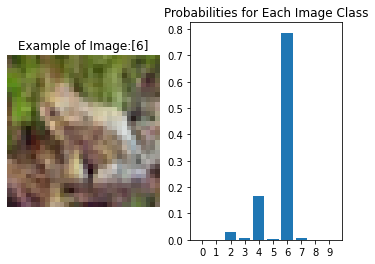

In [194]:
#@title 預設標題文字
i = np.random.randint(0, len(X_test))
img = X_test[i]
# 將圖片轉換成 4D 張量
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_img = X_test_img / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

<H3>
#0 airplane<BR>
#1 car<BR>
#2 bird<BR>
#3 cat<BR>
#4 deer<BR>
#5 dog<BR>
#6 frog<BR>
#7 horse<BR>
#8 ship<BR>
#9 truck<BR>


# DeMO Parts

In [180]:
from google.colab import files
uploaded = files.upload()

Saving ship8.png to ship8.png


In [181]:
from PIL import Image 
import numpy as np

image = Image.open("/content/ship8.png") # openfile
image_arr = np.array(image) 

In [182]:
image_arr

array([[[ 46,  74,  65],
        [ 47,  71,  67],
        [ 49,  72,  69],
        ...,
        [ 63,  90,  86],
        [ 62,  88,  86],
        [ 61,  89,  85]],

       [[ 47,  84,  74],
        [ 53,  88,  81],
        [ 56,  92,  86],
        ...,
        [ 67, 105, 101],
        [ 68, 105, 100],
        [ 69, 104,  98]],

       [[ 55,  85,  80],
        [ 59,  90,  86],
        [ 58,  90,  88],
        ...,
        [ 67,  98,  98],
        [ 67,  99,  96],
        [ 71, 100,  95]],

       ...,

       [[ 49,  80,  75],
        [ 48,  77,  75],
        [ 53,  83,  78],
        ...,
        [ 48,  76,  71],
        [ 46,  77,  71],
        [ 49,  79,  71]],

       [[ 45,  76,  71],
        [ 46,  80,  75],
        [ 54,  85,  80],
        ...,
        [ 49,  78,  73],
        [ 47,  77,  71],
        [ 48,  78,  72]],

       [[ 48,  72,  69],
        [ 52,  84,  78],
        [ 55,  80,  76],
        ...,
        [ 54,  77,  74],
        [ 54,  76,  71],
        [ 53,  79,  73]]

[]

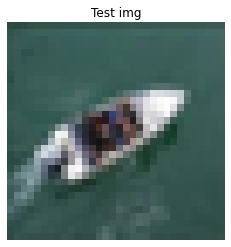

In [183]:
plt.imshow(image_arr)
plt.title("Test img")
plt.axis('off')
plt.plot()

In [184]:
image_arr.reshape(1,32,32,3)

array([[[[ 46,  74,  65],
         [ 47,  71,  67],
         [ 49,  72,  69],
         ...,
         [ 63,  90,  86],
         [ 62,  88,  86],
         [ 61,  89,  85]],

        [[ 47,  84,  74],
         [ 53,  88,  81],
         [ 56,  92,  86],
         ...,
         [ 67, 105, 101],
         [ 68, 105, 100],
         [ 69, 104,  98]],

        [[ 55,  85,  80],
         [ 59,  90,  86],
         [ 58,  90,  88],
         ...,
         [ 67,  98,  98],
         [ 67,  99,  96],
         [ 71, 100,  95]],

        ...,

        [[ 49,  80,  75],
         [ 48,  77,  75],
         [ 53,  83,  78],
         ...,
         [ 48,  76,  71],
         [ 46,  77,  71],
         [ 49,  79,  71]],

        [[ 45,  76,  71],
         [ 46,  80,  75],
         [ 54,  85,  80],
         ...,
         [ 49,  78,  73],
         [ 47,  77,  71],
         [ 48,  78,  72]],

        [[ 48,  72,  69],
         [ 52,  84,  78],
         [ 55,  80,  76],
         ...,
         [ 54,  77,  74],
        

Predicting ...


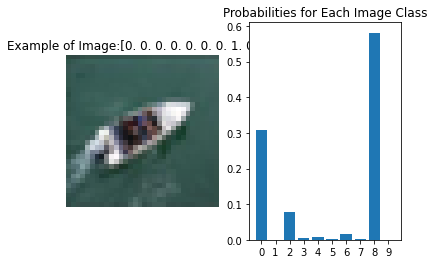

In [185]:
#@title 預設標題文字
img = image_arr
# 將圖片轉換成 4D 張量
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_img = X_test_img / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

<H3>
#0 airplane<BR>
#1 car<BR>
#2 bird<BR>
#3 cat<BR>
#4 deer<BR>
#5 dog<BR>
#6 frog<BR>
#7 horse<BR>
#8 ship<BR>
#9 truck<BR>
